## Описание проекта

Проализируем данные интернет-магазина «Стрим», продающего компьютерные игры. Датасет содержит информацию о продажах, жанрах, платформах, оценках пользователей и критиков, а также возрастных рейтингах игр до 2016 года.

Цель проекта:

Выявить закономерности и факторы, позволяющие интернет-магазину «Стримчик» прогнозировать наиболее перспективные игры и платформы для продаж в 2017 году.

План работы:

Откроем файл с данными и изучим общую информацию

Подготовим данные

Проведем исследовательский анализ

Составим портрет пользователя каждого региона

Сформулируем и проверим гипотезы

Общий вывод

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import missingno as msno

## Откроем файл с данными и изучим общую информацию

In [3]:
# Загрузим датасет и создадим датафрейм
file_path = "/datasets/games.csv"
df = pd.read_csv(file_path)

In [4]:
# Посмотрим на общую информацию датафрейма
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Размер данных: 16715 строк, 11 столбцов.

В ряде столбцов имеются пропуски.

Замечания по типам данных:

Year_of_Release - float64, а должен быть целочисленный Int64 (год выпуска).
User_Score - object, а должен быть float64 (оценки пользователей).
Rating - object, но логично перевести в category (ограниченный список значений).

In [5]:
# Посмотрим на первые строки датафейма
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Анализ первых 5 строк:

Некоторые игры не имеют оценок (значение NaN в Critic_Score и User_Score).
Некоторые рейтинги не имеют оценок (значение NaN в Rating).
Продажи сильно варьируются (от 11 до 41 млн копий).

In [6]:
# Отобразим расширенные статистические характеристики датафрейма
df.describe(include='all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


Интерпретация расширенных статистических характеристик датасета:

Название игры (Name)
Уникальных игр: 11 559
Вывод: Самая частая игра: Need for Speed: Most Wanted (встречается 12 раз)

Платформа (Platform)
31 уникальных платформ
Самая насыщенная играми платформа: PS2 (2161 игр)
Вывод: Большинство игр выходило на PlayStation 2, стоит проверить популярность других платформ.

Жанр (Genre)
12 уникальных жанров
Самый популярный: Action (3369 игр)
Вывод: Экшен-игры доминируют, стоит проверить продажи по жанрам.

Рейтинг (Rating)
8 уникальных рейтингов ESRB
Самый частый: E (Everyone) – 3990 игр
Вывод: Большинство игр рассчитано на широкий круг игроков.

Год выпуска (Year_of_Release)
Даннные надо будет привести к целочисленным значениям
Диапазон: 1980 – 2016
Вывод: Большинство игр вышло после 2000 года, но есть ретро-игры.

Продажи по регионам (NA_sales, EU_sales, JP_sales, Other_sales)

Средние продажи:
Северная Америка: 0.26 млн
Европа: 0.14 млн
Япония: 0.08 млн
Остальные регионы: 0.05 млн

Максимальные продажи (по одному тайтлу):
NA: 41.36 млн
EU: 28.96 млн
JP: 10.22 млн
Other: 10.57 млн
Вывод: В Северной Америке больше всего популярных игр, но в Японии есть свой уникальный рынок.

Оценки (Critic_Score, User_Score)
Средний балл критиков: 69 (из 100)
Средний балл пользователей: Данных мало, есть пропуски.
Максимальный балл критиков: 98
Вывод: Игры чаще всего получают оценки в диапазоне 60-80, но возможны выбросы.

## Подготовка данных

### Замените названия столбцов (приведите к нижнему регистру)

In [7]:
# Приводим названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

# Выводим первые 5 строк, чтобы проверить изменения
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Названия столбцов приведены к нижнему регистру. Теперь они удобнее для работы.

### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

Преобразуем данные:

year_of_release – год выпуска, 269 пропущенных значений, тип (float64) лучше перевести в целочисленный int. 

rating переведем  с object на категориальный тип (category), так как он содержит 8 уникальных значений. Это уменьшит объем памяти и упростит анализ. Удобство анализа – можно быстро работать с группировками и другими методами.

user_score преобразуем в числовой формат float, а также заменим 'tbd' на NaN, (To Be Determined, значит «Оценка пока не определена»). Применим аргумент errors="coerce", если в момент преобразоввания встретятся нечисловые значения (например, "tbd"), они заменятся на NaN (пропущенные значения).

In [8]:
 # Преобразуем year_of_release в целочисленный тип (где нет пропусков)
df["year_of_release"] = pd.to_numeric(df["year_of_release"], errors="coerce").astype("Int32")

# Преобразуем rating в категориальный тип данных
df["rating"] = df["rating"].astype("category")

# Преобразуем user_score в числовой формат, заменим 'tbd' на NaN
df["user_score"] = pd.to_numeric(df["user_score"], errors="coerce")

# Выведем информацию о датафрейме после преобразования типов
df.info()

# Выведем первые 5 строк датафрейма после преобразования типов
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16446 non-null  Int32   
 3   genre            16713 non-null  object  
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   category
dtypes: Int32(1), category(1), float64(6), object(3)
memory usage: 1.2+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


После преобразования:

year_of_release — Int32 (целочисленный год).

user_score — float64 (оценки пользователей).

rating — category (категориальный рейтинг).

### Обработайте пропуски при необходимости

Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

In [9]:
# Посмотрим количество пропусков
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Анализ пропусков:

platform, na_sales / eu_sales / jp_sales / other_sales - пропусков нет, всё в порядке.

name и genre – мало пропусков (2 шт.), можно просто удалить, 2 случая из 16715 не критичны. 

year_of_release - есть пропущенные (269 шт.), удалим строки, так как год важен для анализа трендов. Заполнять медианой или средним нельзя, так как это изменит историческую картину.

critic_score - очень много пропусков (8579), далеко не все игры содержат оценку критиков. Оставим NaN, так как заполнение средним может исказить анализ.

user_score - очень много пропусков (9125), для анализа корреляций (оценки vs. продажи) оставим NaN, удалять нельзя (слишком много данных потеряем).

rating - много пропусков (6766), заполним NaN значением "Unknown", чтобы не терять данные. Так как столбец rating уже приведен к категориальному типу (category), предарительно добавим "Unknown" в список допустимых категорий. 

Примечание:

Была идея заполнить пропуски в rating  на основе жанра, так как ESRB-рейтинг чаще всего зависит от жанра. Однако, у этой идеи есть свои плюсы и минусы: ESRB-рейтинг действительно связан с жанром, но в то же время рейтинг зависит не только от жанра, но и от платформы, региона и контента. Таким образом можно внести ошибочные данные: если у 50% RPG игр рейтинг M, а у 50% — T, как выбрать правильный? Поэтому вместо автоматической замены по жанру, решено в итоге заполнить NaN значением "Unknown".

In [11]:
# Удаляем строки с пропусками в критически важных столбцах
df = df.dropna(subset=["name", "genre", "year_of_release"])

# Добавляем "Unknown" в список категорий
df["rating"] = df["rating"].cat.add_categories("Unknown")

# Заполняем пропуски
df["rating"] = df["rating"].fillna("Unknown")

In [12]:
# Проверим количество пропусков после обработки данных
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Пропуски остались только в столбцах critic_score и user_score. Двигаемся дальше.

### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [13]:
# Создадим столбец total_sales, в который сложим продажи игры во всех регионах
df["total_sales"] = df["na_sales"] + df["eu_sales"] + df["jp_sales"] + df["other_sales"]

# Выведем первые 5 строк датафрейма после преобразования типов
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


Все корректно. Теперь у каждой игры есть итоговый объем продаж.

Комментарий студента:

Подготовка данных выполнена. 

Привели названия столбцов к нижнему регистру, преобразовали year_of_release в целочисленный тип (где нет пропусков), преобразовали rating в категориальный тип данных, преобразовали user_score в числовой формат, заменили 'tbd' на NaN.

Удалили строки с пропусками в критически важных столбцах - name, genre, year_of_release. Добавили "Unknown" в список категорий и заполнили им пропуски в rating. Пропуски оставили только в столбцах critic_score и user_score. 
Создали столбец total_sales, в который сложили продажи игры во всех регионах.

Датафрейм готов к проведению исследовательского анализа данных. 

## Проведите исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

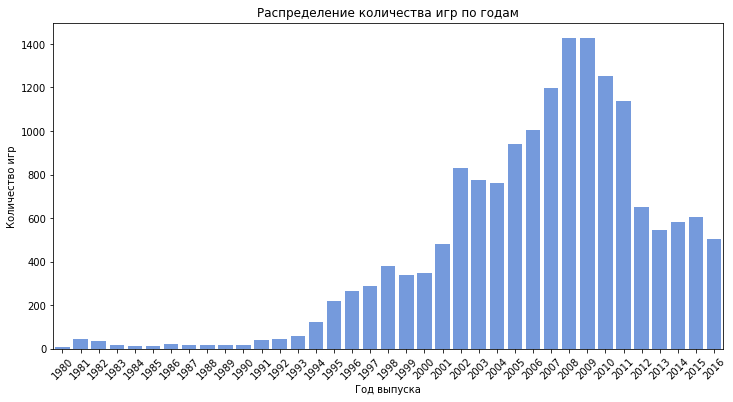

In [14]:
# Группируем данные по году выпуска и считаем количество игр
games_per_year = df.groupby("year_of_release")["name"].count()

# Строим график
plt.figure(figsize=(12, 6))
sns.barplot(x=games_per_year.index, y=games_per_year.values, color="cornflowerblue")
plt.xticks(rotation=45)
plt.xlabel("Год выпуска")
plt.ylabel("Количество игр")
plt.title("Распределение количества игр по годам")
plt.show()

Вывод:

Начиная с 1994 года начинается плавный и увернный рост количества выпускаемых на рынок игр. 2001-2002 рынок пережил мощный рост и к 2008-2009 годам вышел на свои пиковые значения - около 1400 игр ежегодно. Начиная с 2010 года рынок начал снижаться, в 2012 году произошло мощное падение до уровня 600-700 игр в год. Период 2012-2016 можно охарактеризовать как относчительно стабильное плато в районе 600-500 игровых тайтлов ежегодно. 

1980-1995 – данные за этот период не стоит брать во внимание, данных слишком мало, индустрия была другой.

Последние 10 лет можно взять  для анализа трендов. Для прогнозирования на 2017 год оптимально анализировать данные за последние 5-6 лет, так как рынок сильно изменился после 2010 года.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Лидеры продаж (все года):
platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64


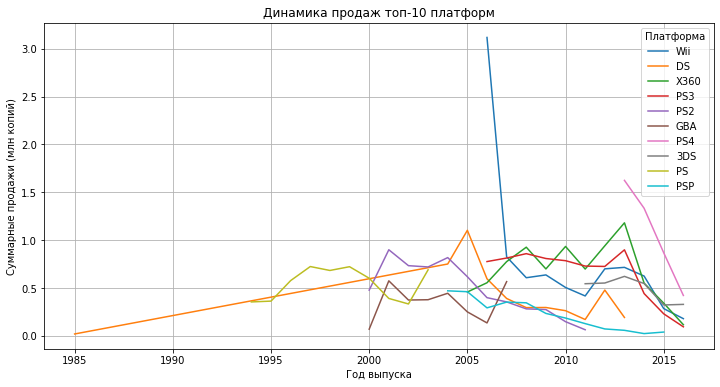

<Figure size 864x432 with 0 Axes>

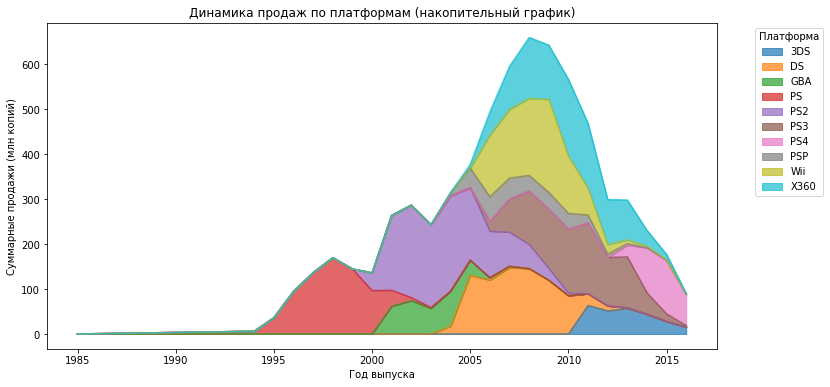

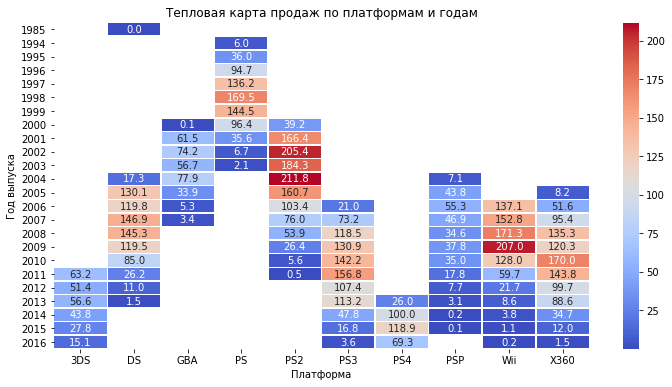

In [15]:
# Группируем данные и выбираем топ-10 платформ по суммарным продажам
top_platforms = df.groupby("platform")["total_sales"].sum().nlargest(10)
top_platforms_list = top_platforms.index.tolist()

# Выводим топ-10 платформ лидеров продаж
print("Лидеры продаж (все года):")
print(top_platforms)

# Фильтруем только топ-10 платформ
df_top = df[df["platform"].isin(top_platforms_list)]

# Строим линейный график динамики продаж по годам
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top, x="year_of_release", y="total_sales", hue="platform", ci=None)

plt.title("Динамика продаж топ-10 платформ")
plt.xlabel("Год выпуска")
plt.ylabel("Суммарные продажи (млн копий)")
plt.legend(title="Платформа")
plt.grid()
plt.show()

# Построим график с накоплением объема продаж всех платформ
plt.figure(figsize=(12, 6))
df_top_grouped = df_top.groupby(["year_of_release", "platform"])["total_sales"].sum().unstack()
df_top_grouped.plot(kind="area", stacked=True, colormap="tab10", alpha=0.7, figsize=(12, 6))
plt.title("Динамика продаж по платформам (накопительный график)")
plt.xlabel("Год выпуска")
plt.ylabel("Суммарные продажи (млн копий)")
plt.legend(title="Платформа", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Построим Heatmap (тепловая карта продаж), оценим активность платформ по годам
df_pivot = df_top.pivot_table(index="year_of_release", columns="platform", values="total_sales", aggfunc="sum")
plt.figure(figsize=(12, 6))
sns.heatmap(df_pivot, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".1f")
plt.title("Тепловая карта продаж по платформам и годам")
plt.xlabel("Платформа")
plt.ylabel("Год выпуска")
plt.show()

Анализ продаж:

Графики, которые на основе анализа продаж позволяют вынести полезные инсайты относительно платформ.

Лидер продаж по миру - платформа PS2 (1233.56 млн. проданных копий), за ней соответственно идут X360, PS3, Wii, DS, PS, PS4, GBA, PSP и замыкает десятку лидеров по общемировым продажам платформа 3DS (257.81 млн. проданных копий).

Срок жизни платформ:

Каждая платформа существует в среднем 7-10 лет.
Например, PS2 появилась в 2000 году и перестала быть актуальной к 2010-2012.
Xbox 360 доминировал примерно с 2005 по 2015.
Новые платформы появляются каждые 5-7 лет, сменяя старые.

Резкий спад некоторых платформ:

У Wii заметен пик продаж в 2006-2009, но затем резкое падение.
У PS2 и DS тоже похожая картина — пик популярности в 2000-х, затем спад.

Новые платформы:

PS4 и 3DS начали набирать популярность ближе к 2013-2015.
У PS4 есть потенциал для дальнейшего роста (по состоянию на конец периода данных).

Общий тренд: снижение продаж физических копий с 2013 года.

Снижение продаж игр после 2013 года связано с ростом цифровой дистрибуции и переходом индустрии в цифровой формат. Люди стали покупать и играть в игры онлайн, а физические копии стали терять былую популярность. 
Steam (PC) уже с 2004 года активно развивался, но к 2013 стал доминирующей платформой. Xbox Live и PlayStation Store стали основными каналами распространения игр для новых консолей (PS4, Xbox One). Nintendo также начала активнее продвигать eShop.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.


Для прогноза на 2017 год актуальным периодом будем считать 2014–2016 годы, то есть данные за последние 3 года. 
Этот отрезок времени позволит отразить текущие тенденции в индустрии и позволит получить более релевантные результаты для анализа и сделать более точные прогнозы. 

Обоснование: 

Тренды в индустрии:
Рынок игр очень динамичный и быстроменяющийся, но тренд последних 3 лет (2014–2016) все еще можно использовать для прогноза на 2017.

Репрезентативность данных:
Данные до 2006 года нерепрезентативны, так как индустрия сильно изменилась.
Платформы живут в среднем 5-7 лет, поэтому прогноз на 2017 год логичнее строить на данных 3 последних лет.

Продажи платформ:
Пик продаж пришелся на 2008–2009 годы, затем начался спад.
С 2010 года стали активно выходить новые платформы (PS4, XOne), а старые (PS2, DS, Wii) начали уходить с рынка.
После 2013 года новые платформы только начали набирать обороты.

In [16]:
# Фильтруем данные за период 2014–2016 годов
df_filtered = df[(df["year_of_release"] >= 2014) & (df["year_of_release"] <= 2016)]

# Cбросим старые индексы и заменим их на новые
df_filtered.reset_index(drop=True, inplace=True)

# Выводим количество оставшихся записей
df_filtered.shape

(1689, 12)

Фильтрация выполнена! 
За период 2014–2016 годов в датасете осталось 1689 записей, 12 столбцов.

In [17]:
# После фильтрации проверим уникальные значения в year_of_release
print(sorted(df_filtered["year_of_release"].unique()))

[2014, 2015, 2016]


Фильтрация выполнена корректно!

2014, 2015, 2016 - это полный список годов, содержащихся в столбце year_of_release.

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ. Не учитывайте в работе данные за предыдущие годы. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [18]:
# Группируем данные и выбираем топ-10 платформ по суммарным продажам
top_platforms_filtered = df_filtered.groupby("platform")["total_sales"].sum().nlargest(10)

# Выводим на экран список лидеров продаж за 2014–2016 годы
print("Топ-10 платформ по продажам (2014–2016):")
print(top_platforms_filtered)

Топ-10 платформ по продажам (2014–2016):
platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64


Вывод: ключевые платформы — это PS4, XOne, 3DS, PS3 и X360. 

Если сравнить Топ-10 платформ по продажам за 2014–2016 года с Топ-10 платформ по продажам за все года, то произошла смена лидеров: PS4 и Xbox One теперь доминируют, в то время как X360, PS3 и Wii утратили свои позиции. Рост портативных консолей (3DS, PSV), но снижение роли PSP и DS. PC остается в топ-10, но уступает консолям по общему объему продаж.

Таким образом, для прогноза на 2017 год ключевые платформы — это PS4, Xbox One, 3DS и PS3 так как они показывают стабильно высокие продажи в последние три года.

Основные изменения:

Лидером продаж за 2014–2016 стал PS4 (288.15 млн копий), в то время как в общем рейтинге за все годы лидирует PS2 (1233.56 млн). Это подтверждает смену поколений игровых платформ.

PS4 значительно выросла за последние три года, но пока не догнала PS2 по общему числу продаж.

Xbox One (140.36 млн) занимает вторую позицию, что показывает его активный рост в последние годы.

Однако он все еще отстает от X360 (961.24 млн в общем списке), который был одной из самых успешных консолей предыдущего поколения.

3DS (86.68 млн) продолжает показывать хорошие результаты, особенно на японском рынке, но в общем списке она стоит только на 10-м месте (257.81 млн).

Падение продаж старых консолей:

PS3 (68.18 млн) и X360 (48.22 млн) уже не лидируют, а уступают новым платформам.

Wii (5.07 млн) и PSP (0.36 млн) практически исчезли из актуального списка продаж, хотя раньше были в топе.

PC (27.05 млн) стабильно сохраняет свою позицию, но уступает консолям.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

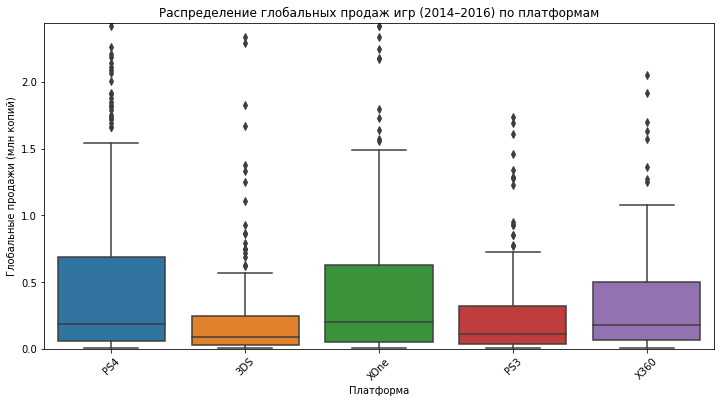

In [19]:
# Определяем список топ-5 платформ за 2014–2016 годы
top_platforms_2014_2016 = ["PS4", "XOne", "3DS", "PS3", "X360"]

# Фильтруем датафрейм, оставляя только нужные платформы
df_top_platforms = df_filtered[df_filtered["platform"].isin(top_platforms_2014_2016)]

# Строим "ящик с усами" для глобальных продаж
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_platforms, x="platform", y="total_sales")

# Ограничиваем ось Y, чтобы убрать сильные выбросы и сделать график нагляднее
plt.ylim(0, df_top_platforms["total_sales"].quantile(0.95))

# Добавляем заголовки и подписи осей
plt.title("Распределение глобальных продаж игр (2014–2016) по платформам")
plt.xlabel("Платформа")
plt.ylabel("Глобальные продажи (млн копий)")

# Поворачиваем подписи платформ для удобства чтения
plt.xticks(rotation=45)

# Показываем график
plt.show()

Выводы:

Проанализируем распределение продаж среди PS4, XOne, 3DS, PS3, X360 в период 2014–2016 годов.

PS4, X360 и XOne — самые прибыльные платформы, так как у них не только много хитов, но и относительно высокие медианные продажи. Наиболее выгодно выделяется из этой тройки лидеров - платформа PS4, много выбросов (хитов). 

3DS и PS3 уступают по уровню продаж, так как их медианы ниже, а выбросов (хитов) меньше.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Отфильтруем датафрейм df_filtered, оставляя только выбранную платформу - PS4.

Удалим строки с пропусками в critic_score и user_score, чтобы корреляция считалась корректно.

Построим диаграммы рассеяния для каждой платформы:

total_sales vs. critic_score

total_sales vs. user_score

Вычислим и проанализируем коэффициенты корреляции.

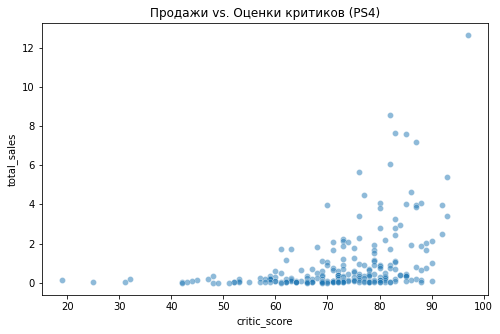

Корреляция между critic_score и total_sales для PS4: 0.40


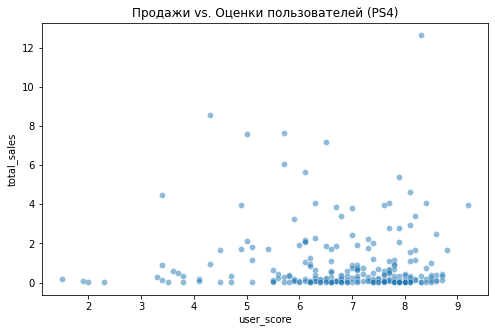

Корреляция между user_score и total_sales для PS4: -0.04


In [20]:
# Фильтруем данные только для PS4
df_ps4 = df_filtered[df_filtered["platform"] == "PS4"].copy()

# Удаляем строки с пропусками в оценках критиков и пользователей
df_ps4 = df_ps4.dropna(subset=["critic_score", "user_score"])

# Функция для построения диаграммы рассеяния и вычисления корреляции
def plot_scatter_and_corr(df, x_col, y_col, title):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[x_col], y=df[y_col], alpha=0.5)
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()
    
    # Считаем коэффициент корреляции Пирсона
    correlation = df[x_col].corr(df[y_col])
    print(f"Корреляция между {x_col} и {y_col} для PS4: {correlation:.2f}")

# Построим диаграммы рассеяния и вычислим корреляцию
plot_scatter_and_corr(df_ps4, "critic_score", "total_sales", "Продажи vs. Оценки критиков (PS4)")
plot_scatter_and_corr(df_ps4, "user_score", "total_sales", "Продажи vs. Оценки пользователей (PS4)")


Выводы:

Оценки критиков оказывают заметное влияние на продажи игр, но не являются единственным фактором. Оценки пользователей не влияют на продажи. Это может объясняться тем, что пользователи ставят оценки уже после покупки, и их мнение не формирует спрос. Для прогнозирования продаж стоит учитывать оценки критиков, но также анализировать другие факторы.

Продажи vs. Оценки критиков (PS4). Коэффициент корреляции: 0.40

На графике видно, что существует умеренная положительная корреляция между оценками критиков и продажами. Чем выше оценки критиков, тем больше вероятность, что игра будет продаваться лучше. Однако есть игры с высокими оценками, но с низкими продажами.

Продажи vs. Оценки пользователей (PS4). Коэффициент корреляции: -0.04

На графике распределение точек хаотичное, не видна явная зависимость. Практически отсутствует связь между оценками пользователей и продажами игр. Это означает, что мнение пользователей не является решающим фактором в продажах игр на PS4.

### Соотнесите выводы с продажами игр на других платформах.

Посмотрим, как влияют на продажи внутри других платформ - "X360", "PS3", "3DS", "XOne" отзывы пользователей и критиков. Построем диаграмы рассеяния и посчитаем корреляцию между отзывами и продажами. Сделаем выводы. 

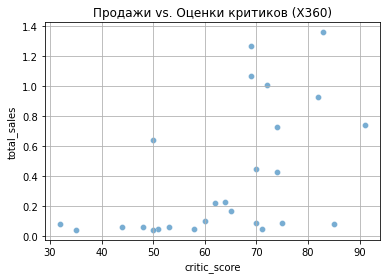

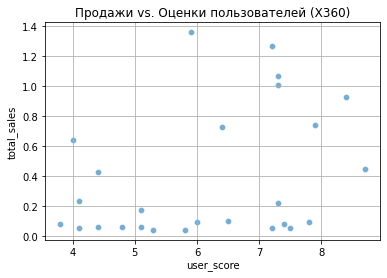

Корреляция между critic_score и total_sales для X360: 0.53
Корреляция между user_score и total_sales для X360: 0.34



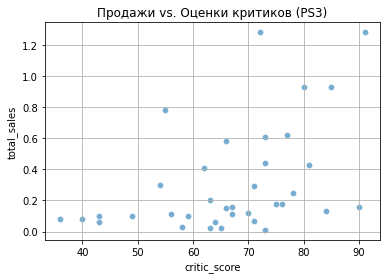

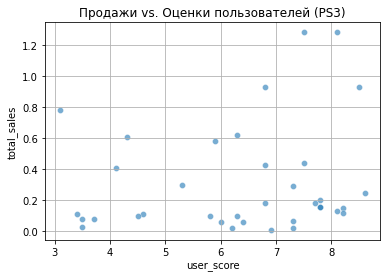

Корреляция между critic_score и total_sales для PS3: 0.45
Корреляция между user_score и total_sales для PS3: 0.16



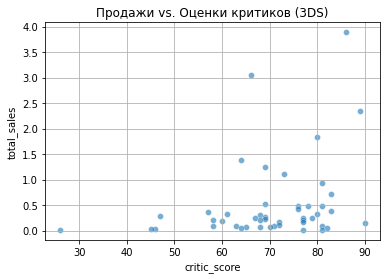

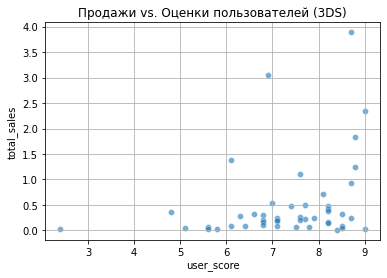

Корреляция между critic_score и total_sales для 3DS: 0.28
Корреляция между user_score и total_sales для 3DS: 0.28



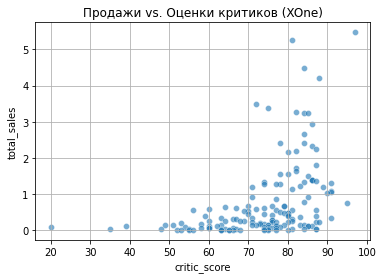

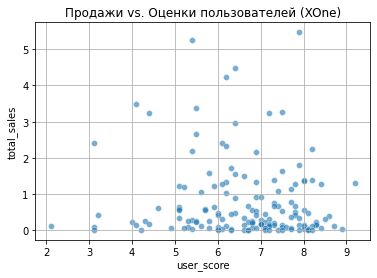

Корреляция между critic_score и total_sales для XOne: 0.42
Корреляция между user_score и total_sales для XOne: -0.09



In [21]:
platforms = ["X360", "PS3", "3DS", "XOne"]

for platform in platforms:
    df_platform = df_filtered[df_filtered["platform"] == platform].dropna(subset=["critic_score", "user_score"])
    
    # Корреляция
    corr_critic = df_platform["total_sales"].corr(df_platform["critic_score"])
    corr_user = df_platform["total_sales"].corr(df_platform["user_score"])
    
    # График: Продажи vs. Оценки критиков
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_platform, x="critic_score", y="total_sales", alpha=0.6)
    plt.title(f"Продажи vs. Оценки критиков ({platform})")
    plt.xlabel("critic_score")
    plt.ylabel("total_sales")
    plt.grid()
    plt.show()
    
    # График: Продажи vs. Оценки пользователей
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_platform, x="user_score", y="total_sales", alpha=0.6)
    plt.title(f"Продажи vs. Оценки пользователей ({platform})")
    plt.xlabel("user_score")
    plt.ylabel("total_sales")
    plt.grid()
    plt.show()
    
    print(f"Корреляция между critic_score и total_sales для {platform}: {corr_critic:.2f}")
    print(f"Корреляция между user_score и total_sales для {platform}: {corr_user:.2f}\n")


Вывод:

Оценки критиков оказывают умеренное влияние на продажи, но степень влияния различается в зависимости от платформы:

Наибольшая зависимость у X360 (0.53) и PS3 (0.45) – это означает, что на этих платформах высокие оценки критиков чаще коррелируют с успешными продажами.

На XOne (0.42) влияние критиков ниже, чем на X360 и PS3, но все еще значимо.

На 3DS (0.28) влияние критиков слабее, что может быть связано с особенностями аудитории (большое число игр для детей и семейного сегмента).

Оценки пользователей оказывают слабое или минимальное влияние на продажи:

На X360 (0.34) и 3DS (0.28) влияние немного выше, но все равно остается низким.

На PS3 (0.16) и XOne (-0.09) влияние пользователей практически отсутствует или даже слегка отрицательное.

Это подтверждает, что игроки принимают решения о покупке еще до появления пользовательских оценок, ориентируясь на маркетинг, трейлеры и обзоры критиков.

Наиболее зависимые от критиков платформы:

X360 и PS3 – наибольшее влияние обзоров критиков.

XOne и 3DS – среднее или низкое влияние критиков.

Итог:

Для прогнозирования продаж важно учитывать оценки критиков, так как они имеют наибольшее влияние на X360, PS3 и XOne.

Оценки пользователей не играют решающей роли в продажах, и их влияние либо слабое, либо отсутствует.

При планировании продаж стоит учитывать не только оценки, но и другие факторы – рекламные кампании, эксклюзивность игр, узнаваемость франшизы и популярность платформы. 

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

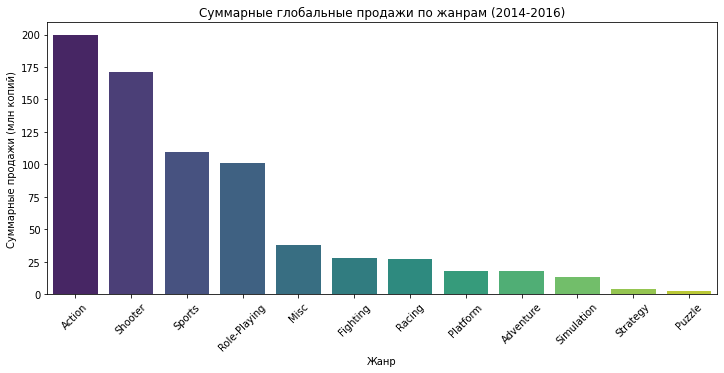

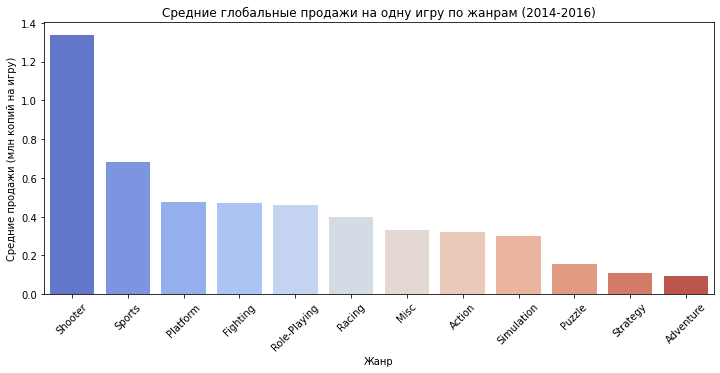

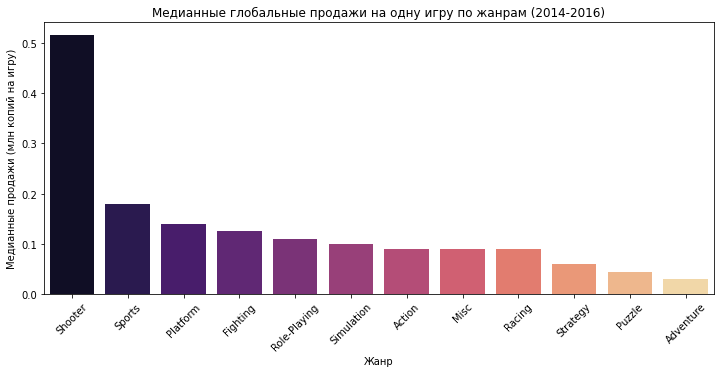

In [22]:
# Группируем данные по жанрам и считаем суммарные, средние и медианные продажи
genre_sales = df_filtered.groupby("genre")["total_sales"].sum().sort_values(ascending=False)
genre_mean_sales = df_filtered.groupby("genre")["total_sales"].mean().sort_values(ascending=False)
genre_median_sales = df_filtered.groupby("genre")["total_sales"].median().sort_values(ascending=False)

# Визуализируем суммарные продажи
plt.figure(figsize=(12, 5))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Жанр")
plt.ylabel("Суммарные продажи (млн копий)")
plt.title("Суммарные глобальные продажи по жанрам (2014-2016)")
plt.show()

# Визуализируем средние продажи на одну игру
plt.figure(figsize=(12, 5))
sns.barplot(x=genre_mean_sales.index, y=genre_mean_sales.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Жанр")
plt.ylabel("Средние продажи (млн копий на игру)")
plt.title("Средние глобальные продажи на одну игру по жанрам (2014-2016)")
plt.show()

# Визуализируем медианные продажи на одну игру
plt.figure(figsize=(12, 5))
sns.barplot(x=genre_median_sales.index, y=genre_median_sales.values, palette="magma")
plt.xticks(rotation=45)
plt.xlabel("Жанр")
plt.ylabel("Медианные продажи (млн копий на игру)")
plt.title("Медианные глобальные продажи на одну игру по жанрам (2014-2016)")
plt.show()



Сгруппируем данные по жанрам и считаем суммарные, средние и медианные продажи. Визуализируем и сделаем выводы.

Анализ прибыльности жанров:

Общее распределение продаж по жанрам

Наибольшие суммарные продажи показывают жанры Action, Shooter и Sports.

Это связано с большим количеством выпущенных игр в этих жанрах.

Жанры Puzzle и Strategy имеют наименьшие суммарные продажи.

Средние продажи на одну игру

Shooter, Sports и Fighting выделяются как жанры с самыми высокими средними продажами.

Это говорит о том, что каждая отдельная игра в этих жанрах продается лучше, чем игры в других категориях.

Несмотря на популярность Action, средние продажи у него ниже, чем у лидеров.

Медианные продажи на игру

Shooter снова занимает первое место, что подтверждает его высокую доходность.

Sports, Fighting и Role-Playing также показывают достойные результаты.

Adventure и Puzzle остаются в числе самых низкодоходных жанров.

Вывод

Жанр Shooter можно назвать самым прибыльным, так как он занимает лидирующие позиции как по суммарным, так и по средним продажам.

Жанры Sports и Fighting также можно считать успешными: игр в этих категориях не так много, но их продажи высоки.

Action популярен, но из-за большого количества игр средние продажи ниже.

Puzzle и Adventure имеют наименьшие продажи как в общем, так и в среднем на игру.

## Составьте портрет пользователя каждого региона. Определите для пользователя каждого региона (NA, EU, JP):

* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

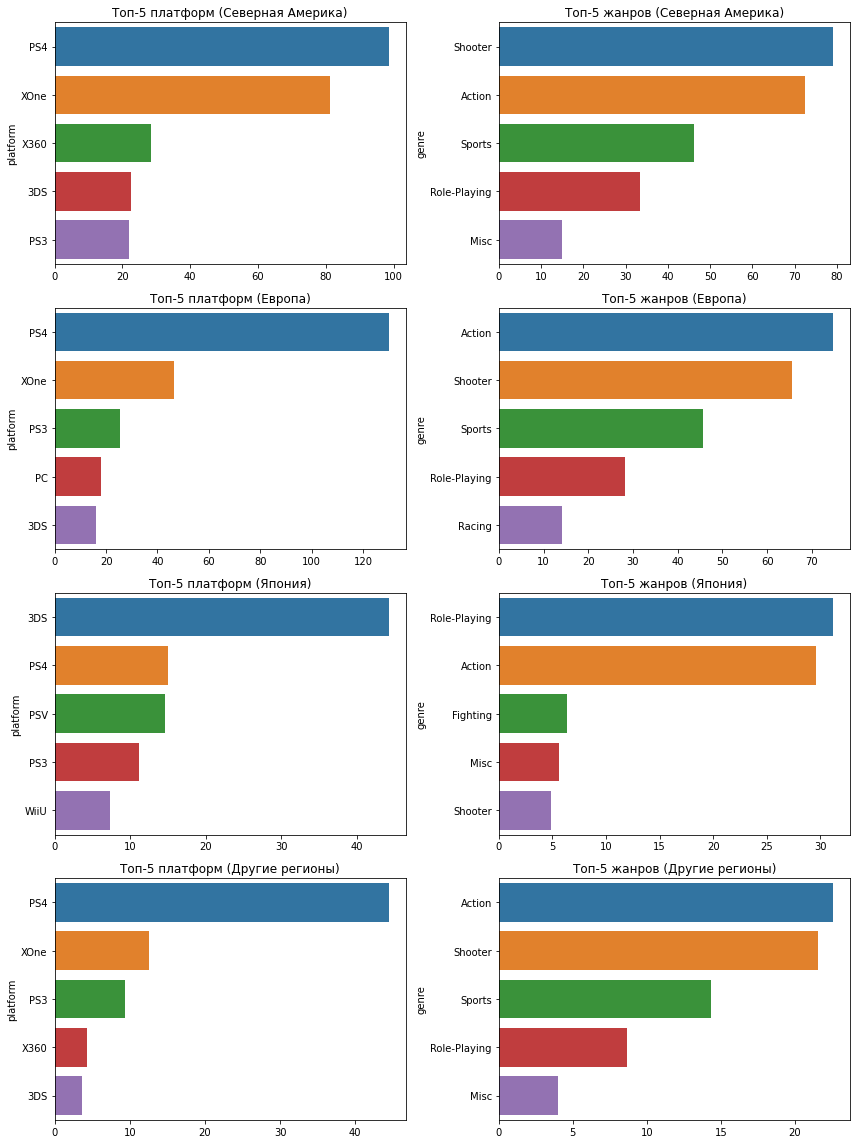

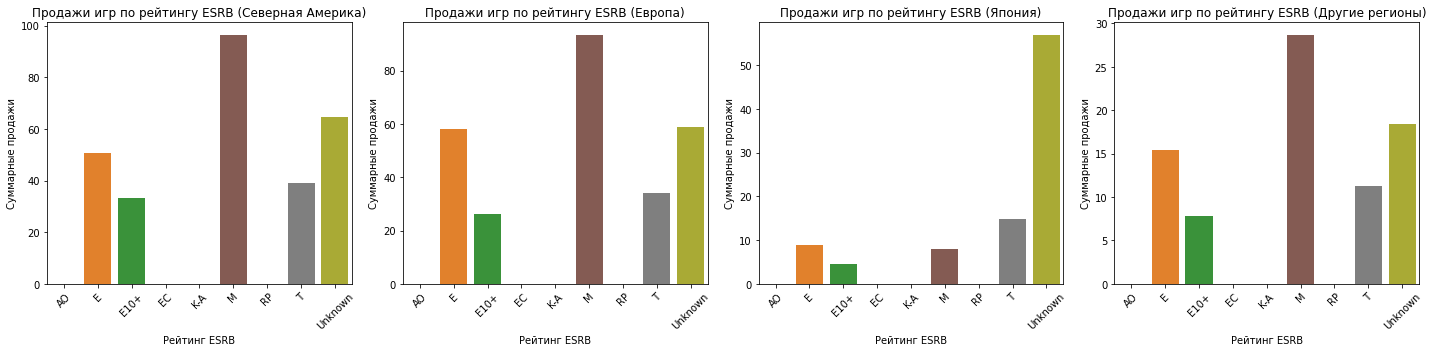

In [23]:
# Топ-5 платформ по продажам в каждом регионе
def top_platforms_by_region(df, region):
    top_platforms = df.groupby('platform')[region].sum().nlargest(5)
    return top_platforms

# Топ-5 жанров по продажам в каждом регионе
def top_genres_by_region(df, region):
    top_genres = df.groupby('genre')[region].sum().nlargest(5)
    return top_genres

# Влияние рейтинга ESRB на продажи в регионе
def esrb_sales_by_region(df, region):
    esrb_sales = df.groupby('rating')[region].sum().sort_values(ascending=False)
    return esrb_sales

# Фильтруем данные по регионам
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
region_labels = {
    'na_sales': 'Северная Америка', 
    'eu_sales': 'Европа', 
    'jp_sales': 'Япония', 
    'other_sales': 'Другие регионы'
}

top_platforms = {region: top_platforms_by_region(df_filtered, region) for region in regions}
top_genres = {region: top_genres_by_region(df_filtered, region) for region in regions}
esrb_sales = {region: esrb_sales_by_region(df_filtered, region) for region in regions}

# Визуализация топ-5 платформ и жанров в каждом регионе
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

for i, region in enumerate(regions):
    sns.barplot(x=top_platforms[region].values, y=top_platforms[region].index, ax=axes[i, 0])
    axes[i, 0].set_title(f"Топ-5 платформ ({region_labels[region]})")
    
    sns.barplot(x=top_genres[region].values, y=top_genres[region].index, ax=axes[i, 1])
    axes[i, 1].set_title(f"Топ-5 жанров ({region_labels[region]})")

plt.tight_layout()
plt.show()

# Визуализация влияния рейтинга ESRB на продажи
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, region in enumerate(regions):
    sns.barplot(x=esrb_sales[region].index, y=esrb_sales[region].values, ax=axes[i])
    axes[i].set_title(f"Продажи игр по рейтингу ESRB ({region_labels[region]})")
    axes[i].set_xlabel("Рейтинг ESRB")
    axes[i].set_ylabel("Суммарные продажи")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Самые популярные платформы (топ-5).

Северная Америка (NA):
Топ-5 платформ: PS4, XOne, X360, 3DS, PS3.
Доминируют консоли нового поколения, такие как PS4 и XOne. Однако Xbox 360 по-прежнему показывает значительные продажи, что свидетельствует о высокой популярности предыдущего поколения консолей в регионе. Продажи портативных устройств, таких как 3DS, значительно ниже.

Европа (EU):
Топ-5 платформ: PS4, XOne, PS3, PC, 3DS.
PS4 значительно опережает остальные платформы по продажам. В отличие от NA, в Европе в топ входит ПК, что подчеркивает популярность компьютерных игр. Продажи портативных консолей, таких как 3DS, остаются умеренными.

Япония (JP):
Топ-5 платформ: 3DS, PS4, PSV, PS3, WiiU.
Японский рынок сильно ориентирован на портативные консоли, с явным доминированием 3DS. PS4 занимает второе место, показывая хорошие результаты среди домашних консолей. Также высокие позиции занимают PSV (PlayStation Vita) и WiiU.

Другие регионы (Other):
Топ-5 платформ: PS4, XOne, PS3, X360, 3DS.
Консоли нового поколения (PS4 и XOne) лидируют, при этом PS3 сохраняет значительную популярность. Продажи портативных устройств, таких как 3DS, скромнее по сравнению с домашними консолями.

Различия в долях продаж:

Северная Америка и Европа показывают схожие предпочтения с доминированием домашних консолей нового поколения (PS4 и XOne).

В Японии наблюдается явный сдвиг в сторону портативных платформ (3DS и PSV), что связано с особенностями образа жизни.

В других регионах популярность распределяется между платформами нового поколения и предыдущего, при этом портативные устройства занимают меньшую долю.

### Самые популярные жанры (топ-5). Поясните разницу.


Самые популярные жанры (топ-5).

Северная Америка (NA):
Топ-5 жанров: Action, Shooter, Sports, Role-Playing, Misc.
Экшен и шутеры являются абсолютными лидерами, что связано с популярностью динамичных игр и франшиз вроде Call of Duty и GTA. Спортивные игры занимают третье место, благодаря интересу к таким сериям, как Madden и NBA. Ролевые игры имеют умеренную популярность, занимая четвёртую позицию.

Европа (EU):
Топ-5 жанров: Action, Shooter, Sports, Role-Playing, Racing.
Результаты схожи с Северной Америкой, однако в Европе немного больше внимания уделяется гоночным играм, которые входят в топ-5. Это объясняется популярностью таких франшиз, как Forza и Gran Turismo. Доля ролевых игр также достаточно высока, близка к показателям в NA.

Япония (JP):
Топ-5 жанров: Role-Playing, Action, Fighting, Misc, Shooter.
На японском рынке ролевые игры являются безусловным лидером. Такие франшизы, как Final Fantasy и Dragon Quest, формируют значительную долю рынка. Экшен также популярен, занимая вторую позицию. На третьем месте находятся файтинги, что связано с успехом игр вроде Tekken и Street Fighter. Шутеры занимают низкую позицию, что отражает меньшее внимание японской аудитории к этому жанру.

Другие регионы (Other):
Топ-5 жанров: Action, Shooter, Sports, Role-Playing, Misc.
Жанровые предпочтения здесь схожи с NA и EU. Экшен и шутеры лидируют, что говорит о глобальной популярности этого типа игр. Спортивные игры также занимают высокую позицию, а ролевые игры находятся на четвёртой позиции.

Различия между регионами:

В Северной Америке и Европе доминируют экшен и шутеры, а спортивные игры играют важную роль.

Япония отличается сильным фокусом на ролевых играх и файтингах, с низким интересом к шутерам и спортивным играм.

В других регионах предпочтения схожи с NA/EU, хотя доля ролевых игр немного выше, что может быть связано с культурными влияниями японских игр.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Северная Америка (NA):
Наибольшие продажи имеют игры с рейтингом "M" (Mature), что связано с популярностью шутеров и экшен-игр, ориентированных на взрослую аудиторию (например, Call of Duty, Grand Theft Auto). Рейтинг "E" (Everyone) занимает второе место благодаря семейным и спортивным играм, таким как FIFA и Madden. Рейтинг "T" (Teen) имеет меньшую долю, что указывает на меньший интерес к играм, ориентированным на подростковую аудиторию. Категория "E10+" (Everyone 10 and older) также представлена, но с небольшой долей.

Европа (EU):
Ситуация схожа с Северной Америкой. Лидирует рейтинг "M", что подтверждает популярность экшенов и шутеров. На втором месте "E", также благодаря семейным и спортивным играм. Интерес к "T" и "E10+" аналогично ниже, что говорит о схожем распределении интересов аудитории в этих двух регионах.

Япония (JP):
Преобладает категория "Unknown", что связано с различиями между системой ESRB и японской системой рейтингов (CERO). Японский рынок не ориентирован на ESRB, поэтому значительная часть игр попадает в эту категорию. В играх с известным рейтингом большую долю занимают "E" и "T", что указывает на популярность семейных игр и RPG, которые подходят более широкой аудитории. Продажи игр с рейтингом "M" значительно ниже, что связано с меньшей популярностью шутеров и взрослого контента в Японии.

Другие регионы (Other):
Рейтинг "M" также доминирует, как и в NA/EU, указывая на глобальную популярность игр для взрослых. Рейтинг "E" занимает вторую позицию благодаря спортивным и семейным играм. Категория "T" представлена, но с меньшей долей, аналогично другим регионам.

Общие выводы:
Рейтинг ESRB имеет сильное влияние на продажи в Северной Америке и Европе, где аудитория отдаёт предпочтение играм с рейтингом "M" и "E". В Японии влияние рейтинга ESRB минимально из-за использования другой системы рейтингов, а также специфических предпочтений аудитории, которые отдают приоритет ролевым играм и играм для семейной аудитории. В других регионах предпочтения по рейтингам схожи с NA/EU, что подчёркивает глобальную популярность игр с рейтингами "M" и "E".

## Проверьте гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:

* Как вы сформулировали нулевую и альтернативную гипотезы;

* Какой критерий применили для проверки гипотез и почему.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Гипотезы:

Нулевая гипотеза (H₀): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза (H₁): Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Метод проверки:

Используется t-тест Стьюдента для независимых выборок (stats.ttest_ind).

Указываем equal_var=False, так как дисперсии выборок могут быть разными.

Порог значимости (alpha): 0.05 (5%).

Если p_value < alpha, отвергаем нулевую гипотезу (рейтинги различаются). Иначе, недостаточно оснований для отклонения гипотезы (рейтинги не различаются).

In [24]:
# Фильтруем данные по платформам Xbox One и PC
xone_scores = df_filtered[df_filtered['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df_filtered[df_filtered['platform'] == 'PC']['user_score'].dropna()

# Формулировка гипотез:
# H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
# H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

# Выбираем порог значимости
alpha = 0.05

# Применяем тест Стьюдента (t-тест для независимых выборок)
t_stat, p_value = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)

# Вывод результатов
print(f"Статистика t-теста: {t_stat:.3f}")
print(f"p-значение: {p_value:.3f}")

# Интерпретация результатов
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги различаются.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: средние пользовательские рейтинги не различаются.")

Статистика t-теста: 1.578
p-значение: 0.116
Не удалось отвергнуть нулевую гипотезу: средние пользовательские рейтинги не различаются.


Вывод:

Поскольку p-значение (0.116) больше уровня значимости (0.05), у нас недостаточно оснований для отклонения нулевой гипотезы. Это означает, что разницы в средних пользовательских рейтингах платформ Xbox One и PC статистически не выявлено.

Интерпретация:

Средние пользовательские рейтинги игр на Xbox One и PC можно считать схожими в рамках данной выборки. Проще говоря, пользователи оценивают игры на этих двух платформах примерно одинаково.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Гипотезы:

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковы.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются.

Критерий проверки:

Используем t-тест Стьюдента для независимых выборок, так как у нас две независимые группы (жанры Action и Sports).

Уровень значимости (альфа): примем 0.05 (стандартный уровень).

In [25]:
# Фильтруем данные по жанрам Action и Sports
action_scores = df_filtered.loc[df_filtered['genre'] == 'Action', 'user_score'].dropna()
sports_scores = df_filtered.loc[df_filtered['genre'] == 'Sports', 'user_score'].dropna()

# Проверяем равенство дисперсий (тест Левена)
levene_stat, levene_p = stats.levene(action_scores, sports_scores)
equal_var = levene_p > 0.05  # Если p-value > 0.05, дисперсии можно считать равными

# Применяем t-тест Стьюдента
t_stat, p_value = stats.ttest_ind(action_scores, sports_scores, equal_var=equal_var)

# Вывод результатов
print(f"Статистика t-теста: {t_stat:.3f}")
print(f"p-значение: {p_value:.3f}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги различаются.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: средние пользовательские рейтинги не различаются.")

Статистика t-теста: 8.385
p-значение: 0.000
Отвергаем нулевую гипотезу: средние пользовательские рейтинги различаются.


Вывод:

Так как p-значение меньше уровня значимости alpha = 0.05, мы отвергаем нулевую гипотезу. Это означает, что средние пользовательские рейтинги жанров Action и Sports действительно различаются.

Интерпретация:

Разница в средних рейтингах статистически значима. Жанры Action и Sports воспринимаются игроками по-разному с точки зрения оценок.

## Общий вывод

Цель исследования

В рамках проекта был проведен анализ данных о продажах компьютерных игр, оценках пользователей и критиков, а также влиянии различных факторов (жанр, платформа, рейтинг ESRB) на успешность игр. Целью исследования было выявление закономерностей, позволяющих интернет-магазину «Стримчик» прогнозировать наиболее перспективные игры и платформы для продаж в 2017 году.

1. Выбор актуального периода

Анализ показал, что игровой рынок достиг своего пика в 2008–2009 годах с выпуском около 1400 игр ежегодно. После 2010 года началось снижение числа выпускаемых игр, и с 2012 года рынок стабилизировался на уровне 500–600 игр в год. Для прогнозирования продаж в 2017 году целесообразно использовать данные за последние 3 года (2014–2016). Этот период отражает текущие тренды в индустрии и обеспечивает репрезентативность анализа, поскольку рынок значительно изменился после 2010 года.

2. Анализ платформ

Лидером продаж за весь период стала PS2 с общими продажами 1233.56 млн копий, что подтверждает её доминирование в 2000-х годах. За последние 3 года (2014–2016) ситуация изменилась: лидером стала PS4, которая показала стремительный рост, достигнув 288.15 млн копий. Также активно развивалась Xbox One (140.36 млн).

Портативные консоли, такие как 3DS, продолжают занимать значительную долю, особенно на японском рынке. Старые платформы (PS3, X360, Wii) демонстрируют спад, уступая новым поколениям. Важно отметить снижение продаж физических копий, что связано с ростом популярности цифровой дистрибуции через платформы, такие как Steam, Xbox Live, PlayStation Store и Nintendo eShop.

3. Анализ жанров

Жанры с наибольшими суммарными продажами: Action, Shooter, Sports. Shooter является самым прибыльным жанром с точки зрения средних и медианных продаж на одну игру. Sports и Fighting также показывают высокие средние продажи, несмотря на меньшее количество игр в этих жанрах. Жанры Puzzle и Adventure имеют наименьшие показатели как по суммарным, так и по средним продажам. Экшен-игры популярны за счёт массового выпуска, но их средние продажи ниже из-за высокой конкуренции внутри жанра.


4. Региональные различия в предпочтениях

Северная Америка (NA) и Европа (EU):
Доминируют консоли нового поколения (PS4, Xbox One), экшен (Action) и шутеры (Shooter) занимают лидирующие позиции. В Европе в топ-5 платформ также входит PC, а среди жанров популярны гонки (Racing).

Япония (JP):
Рынок сильно ориентирован на портативные консоли (3DS, PSV) и ролевые игры (Role-Playing), которые являются лидерами продаж. Экшен и файтинги занимают вторую и третью позиции, соответственно. Шутеры и спортивные игры менее популярны.

Другие регионы (Other):
Предпочтения схожи с NA и EU, но ролевые игры занимают немного более высокие позиции, что может быть связано с культурным влиянием японских игр.

5. Влияние оценок на продажи

Оценки критиков:
Умеренная положительная корреляция с продажами (наиболее значимая для X360 и PS3 с коэффициентами 0.53 и 0.45 соответственно). Игры с высокими оценками критиков имеют больше шансов на успех.

Оценки пользователей:
Связь между пользовательскими оценками и продажами минимальна (например, коэффициент корреляции для PS4 равен -0.04). Это может быть связано с тем, что пользовательские оценки формируются уже после покупки игры и не влияют на спрос.

6. Проверка гипотез

Средние пользовательские рейтинги платформ Xbox One и PC:
Гипотеза о равенстве средних рейтингов не отвергнута (p-value = 0.116), что говорит об их схожести.

Средние пользовательские рейтинги жанров Action и Sports:
Гипотеза о равенстве средних рейтингов отвергнута (p-value = 0.000). Разница между оценками жанров статистически значима, и пользователи воспринимают их по-разному.

Выводы и рекомендации

Тренды в индустрии:
Переход к цифровой дистрибуции меняет рынок, что снижает продажи физических копий. Магазину «Стримчик» следует рассмотреть возможность расширения онлайн-продаж.

Основные платформы для 2017 года: PS4, Xbox One, 3DS.

Приоритетные жанры:

Акцент следует делать на жанры с высокой прибылью: Shooter, Sports, Fighting. Следует снижать закупки игр в жанрах Puzzle и Adventure из-за их низкой доходности.

Региональные стратегии:

Для Северной Америки и Европы: фокус на экшенах, шутерах и спортивных играх.

Для Японии: приоритет портативных игр и жанра Role-Playing.

Оценки:

Использовать оценки критиков как ориентир при выборе игр для закупки. Оценки пользователей не стоит рассматривать как значимый фактор.

Данное исследование позволит сформировать стратегию продаж и маркетинговых кампаний интернет-магазина «Стримчик» на 2017 год, ориентируясь на тренды последних лет.